### Homework 4:
### Name: Daniel Jang
### GitHub: hjang8659
### USC ID: 6894-6426-04
### Due: Mar 1, 2024

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import math
import re
import os
import glob

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Modeling
import statsmodels.api as sm

# Machine Learning Algorithms and Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import DistanceMetric
from scipy.linalg import pinv
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Feature Scaling and Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Deep Learning
import tensorflow as tf
from tensorflow import keras

c:\Users\hjang\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
bend1 = pd.read_excel("../data/bending1/combined.xlsx")
bend2 = pd.read_excel("../data/bending2/combined.xlsx")
cycle = pd.read_excel("../data/cycling/combined.xlsx")
lying = pd.read_excel("../data/lying/combined.xlsx")
sit = pd.read_excel("../data/sitting/combined.xlsx")
stand = pd.read_excel("../data/standing/combined.xlsx")
walk = pd.read_excel("../data/walking/combined.xlsx")

test_dfs = []
train_dfs = []

for df, activity in zip([bend1, bend2, cycle, lying, sit, stand, walk],
                        ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']):
    test_df = df[df['Source.Name'].isin(['dataset1.csv', 'dataset2.csv'])].copy()
    test_df['activity'] = activity
    test_dfs.append(test_df)

    train_df = df[~df['Source.Name'].isin(['dataset1.csv', 'dataset2.csv'])].copy()
    train_df['activity'] = activity
    train_dfs.append(train_df)

test = pd.concat(test_dfs, ignore_index=True)
train = pd.concat(train_dfs, ignore_index=True)

### 4. Time Series Classification Part 2: Binary and Multiclass Classification
### (a)
### i.

In [3]:
grouped_data = train.groupby(['activity', 'Source.Name'])

agg_functions = {
    'avg_rss12': ['min', 'max', lambda x: x.quantile(0.75)],
    'var_rss12': ['min', 'max', lambda x: x.quantile(0.75)],
    'var_rss23': ['min', 'max', lambda x: x.quantile(0.75)],
}

result = grouped_data.agg(agg_functions)
result.columns = ['_'.join(col).strip() for col in result.columns.values]
result.reset_index(inplace=True)
result['indicator'] = result['activity'].apply(lambda x: 1 if x in ['bending1', 'bending2'] else 0)

col_names = [
    'min1', 'max1', '3rd_q1',
    'min2', 'max2', '3rd_q2',
    'min6', 'max6', '3rd_q6'
]

result.columns = ['activity', 'Source.Name'] + col_names + ['indicator']

result

,activity,Source.Name,min1,max1,3rd_q1,min2,max2,3rd_q2,min6,max6,3rd_q6,indicator
0,bending1,dataset3.csv,35.00,47.40,45.0000,0.0,1.70,0.5000,0.0,1.79,0.9400,1
1,bending1,dataset4.csv,33.00,47.75,45.0000,0.0,3.00,1.1200,0.0,2.18,1.0000,1
2,bending1,dataset5.csv,33.00,45.75,42.7500,0.0,2.83,0.7100,0.0,1.79,0.5000,1
3,bending1,dataset6.csv,37.00,48.00,45.0000,0.0,1.58,0.5000,0.0,5.26,0.8700,1
4,bending1,dataset7.csv,36.25,48.00,44.6700,0.0,1.50,0.5000,0.0,2.96,0.8300,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69,walking,dataset5.csv,20.75,46.25,38.2500,0.0,12.68,5.7225,0.0,9.39,4.3050,0
70,walking,dataset6.csv,21.50,51.00,38.0625,0.0,12.21,5.6250,0.0,10.21,4.5000,0
71,walking,dataset7.csv,18.33,47.67,38.0000,0.0,12.48,5.7450,0.0,8.01,4.3200,0
72,walking,dataset8.csv,18.33,45.75,38.0000,0.0,15.37,5.7675,0.0,8.86,4.2600,0


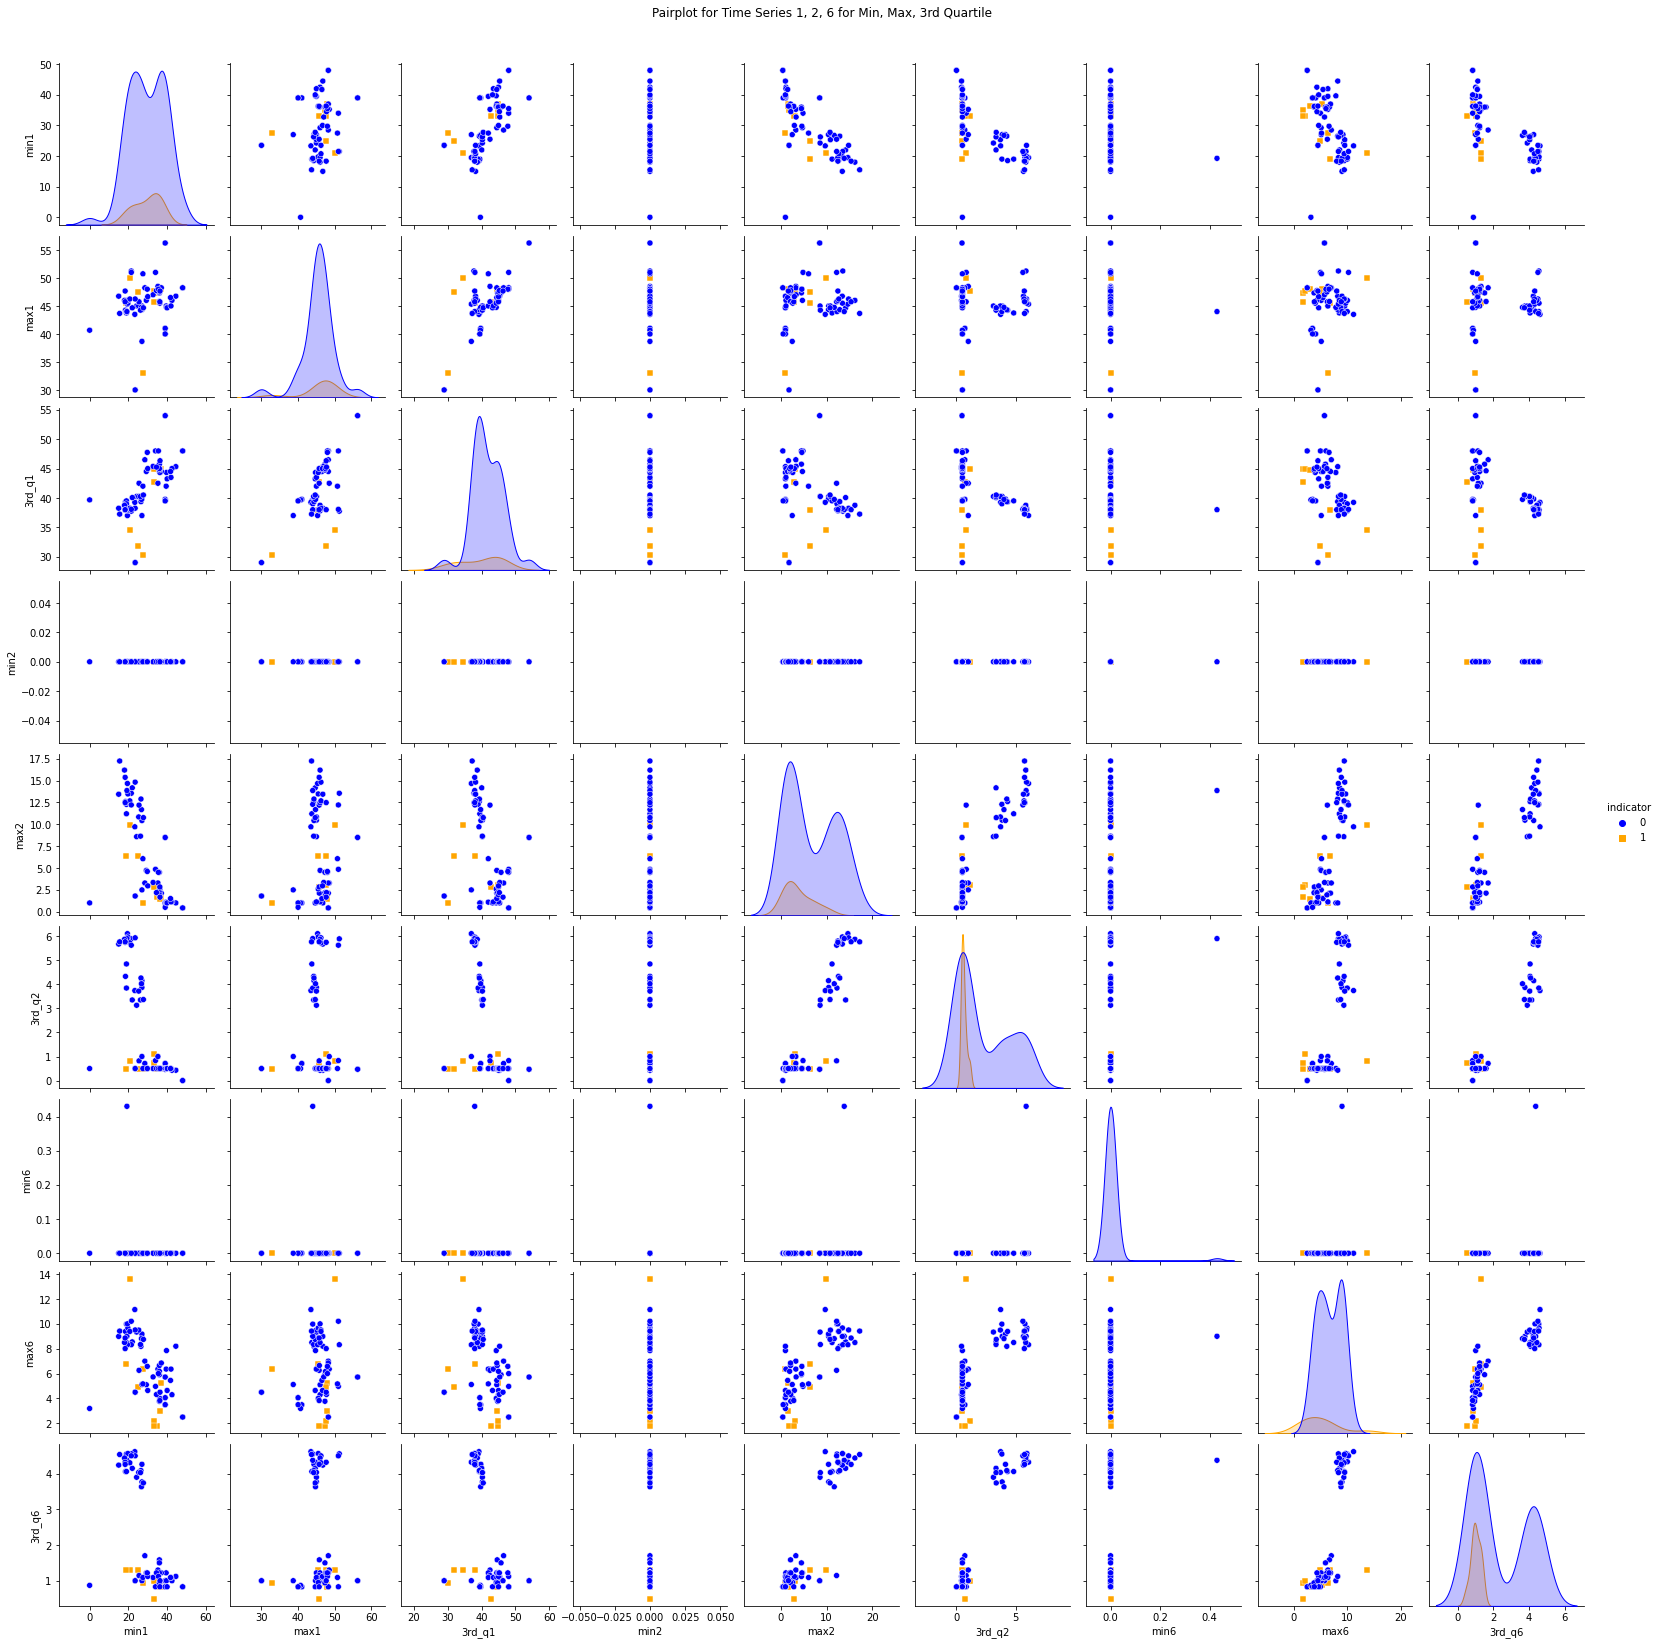

In [4]:
columns_for_pairplot = [
    'min1', 'max1', '3rd_q1',
    'min2', 'max2', '3rd_q2',
    'min6', 'max6', '3rd_q6',
    'indicator'
]

sns.pairplot(result[columns_for_pairplot], hue='indicator', markers=["o", "s"], palette={0: 'blue', 1: 'orange'})
plt.suptitle('Pairplot for Time Series 1, 2, 6 for Min, Max, 3rd Quartile', y=1.02)
plt.show();

### ii.

In [5]:
unique_combinations = train[['activity', 'Source.Name']].drop_duplicates()

first_half = pd.DataFrame()

for index, combination in unique_combinations.iterrows():
    subset = train[(train['activity'] == combination['activity']) & (train['Source.Name'] == combination['Source.Name'])]
    half_len = len(subset) // 2
    first_half = pd.concat([first_half, subset.head(half_len)])

first_half_grouped_data = first_half.groupby(['activity', 'Source.Name'])

first_half_result = first_half_grouped_data.agg(agg_functions)
first_half_result.columns = ['_'.join(col).strip() for col in first_half_result.columns.values]
first_half_result.reset_index(inplace=True)
first_half_result['indicator'] = first_half_result['activity'].apply(lambda x: 1 if x in ['bending1', 'bending2'] else 0)

col_names = [
    'min1', 'max1', '3rd_q1',
    'min2', 'max2', '3rd_q2',
    'min6', 'max6', '3rd_q6'
]

first_half_result.columns = ['activity', 'Source.Name'] + col_names + ['indicator']

first_half_result

,activity,Source.Name,min1,max1,3rd_q1,min2,max2,3rd_q2,min6,max6,3rd_q6,indicator
0,bending1,dataset3.csv,36.50,46.50,45.0000,0.0,1.50,0.5000,0.00,1.79,1.0000,1
1,bending1,dataset4.csv,33.75,47.75,45.2500,0.0,3.00,1.0000,0.00,1.53,1.2200,1
2,bending1,dataset5.csv,33.00,45.75,44.2500,0.0,2.83,0.8300,0.00,1.79,0.7100,1
3,bending1,dataset6.csv,39.00,48.00,45.0000,0.0,1.30,0.5000,0.00,5.26,1.1200,1
4,bending1,dataset7.csv,36.67,45.00,44.5000,0.0,1.30,0.5000,0.00,2.28,0.8300,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69,walking,dataset5.csv,22.33,46.00,38.7500,0.0,12.68,5.7450,0.00,8.83,4.2175,0
70,walking,dataset6.csv,21.50,45.67,37.7500,0.0,12.21,5.7000,0.00,9.19,4.5125,0
71,walking,dataset7.csv,18.33,45.00,37.5000,0.0,12.44,5.6425,0.43,7.89,4.2250,0
72,walking,dataset8.csv,18.33,44.00,38.6900,0.0,12.38,5.5425,0.00,8.86,4.1200,0


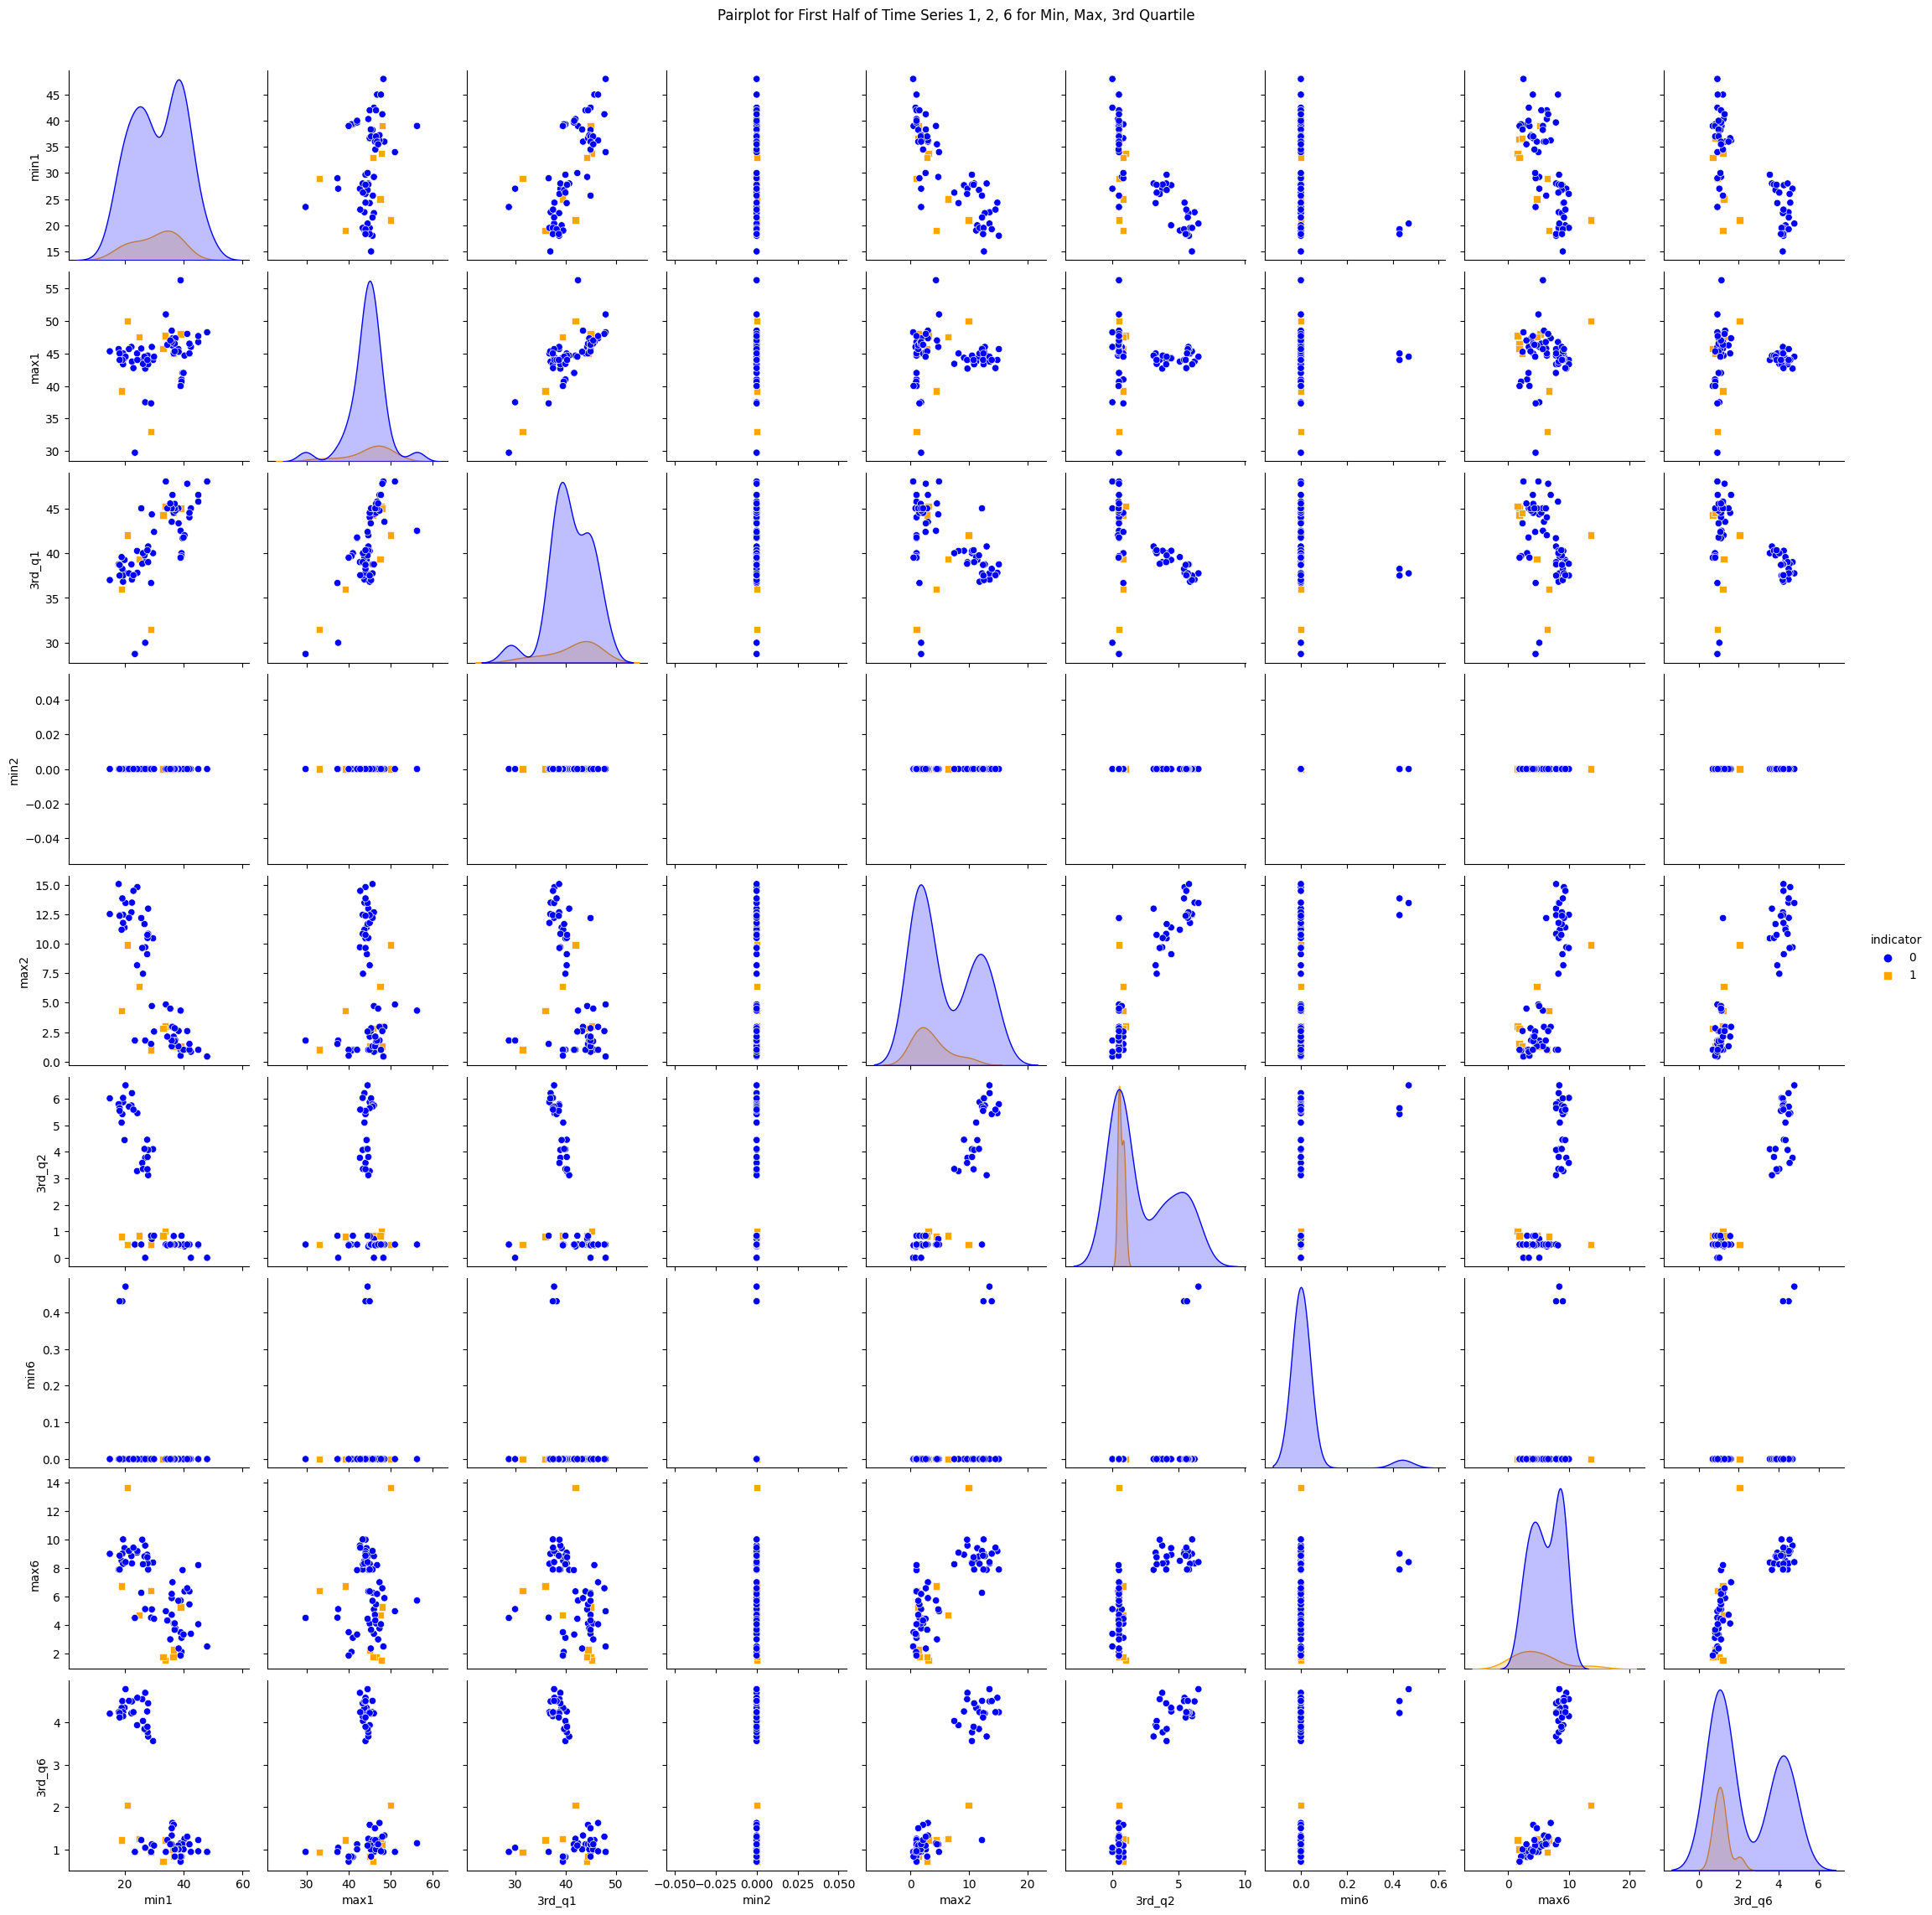

In [6]:
sns.pairplot(first_half_result[columns_for_pairplot], hue='indicator', markers=["o", "s"], palette={0: 'blue', 1: 'orange'})
plt.suptitle('Pairplot for First Half of Time Series 1, 2, 6 for Min, Max, 3rd Quartile', y=1.02)
plt.show();

### Based on two pairplots, the splitted version is has more spread than the original. For example, looking at the original pairplot, from the first row, second and third graphs draws a vertical line ranging from 50 to 20 and completely blank in 20 to 0 range. On the other hand, splitted version draws a vertical line from 50 to 0. This makes sense where since we are cutting half of the data in each dataset of each activity hence we would have wider range of averages. Other than the small spread difference, there are no other notable differences between the two pairplots.
### iii.

In [7]:
best_p = []
score = [] 
l = range(1, 21)

for i in l:
    unique_combinations = train[['activity', 'Source.Name']].drop_duplicates()
    split = pd.DataFrame()

    for index, combination in unique_combinations.iterrows():
        subset = train[(train['activity'] == combination['activity']) & (train['Source.Name'] == combination['Source.Name'])]
        split_len = len(subset) // i
        split = pd.concat([split, subset.head(split_len)])

    split_data = split.groupby(['activity', 'Source.Name'])
    split_result = split_data.agg(agg_functions)
    split_result.columns = ['_'.join(col).strip() for col in split_result.columns.values]
    split_result.reset_index(inplace=True)
    split_result['indicator'] = split_result['activity'].apply(lambda x: 1 if x in ['bending1', 'bending2'] else 0)
    
    columns_to_drop = ['activity', 'Source.Name']
    split_result = split_result.drop(columns=columns_to_drop)
    trainX, trainY = split_result.iloc[:, :-1], split_result.iloc[:, -1]

    validator = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)
    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
    selector = RFECV(estimator=model, cv=validator, scoring='accuracy')
    selector.fit(trainX, trainY)

    best_p.append(selector.n_features_)
    score.append(selector.cv_results_['mean_test_score'])
    print("Pair ({}, {}), scores {}".format(i, best_p[-1], round(max(selector.cv_results_['mean_test_score']), 4)))

Pair (1, 4), scores 0.9057
Pair (2, 1), scores 0.879
Pair (3, 1), scores 0.879
Pair (4, 1), scores 0.879
Pair (5, 1), scores 0.879
Pair (6, 1), scores 0.879
Pair (7, 6), scores 0.9057
Pair (8, 1), scores 0.879
Pair (9, 1), scores 0.879
Pair (10, 1), scores 0.879
Pair (11, 1), scores 0.879
Pair (12, 4), scores 0.8924
Pair (13, 1), scores 0.879
Pair (14, 1), scores 0.879
Pair (15, 1), scores 0.879
Pair (16, 8), scores 0.88
Pair (17, 8), scores 0.9067
Pair (18, 8), scores 0.9067
Pair (19, 9), scores 0.92
Pair (20, 8), scores 0.92


### iv

In [8]:
model_statsmodels = sm.Logit(trainY.to_numpy(dtype=float), sm.add_constant(trainX.to_numpy(dtype=float)))
result_statsmodels = model_statsmodels.fit(method='bfgs')

print(result_statsmodels.summary())

         Current function value: 0.137729
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   74
Model:                          Logit   Df Residuals:                       64
Method:                           MLE   Df Model:                            9
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                  0.6279
Time:                        19:08:04   Log-Likelihood:                -10.192
converged:                      False   LL-Null:                       -27.391
Covariance Type:            nonrobust   LLR p-value:                 7.607e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5541      5.098      0.305      0.760      -8.438      11.5

c:\Users\hjang\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


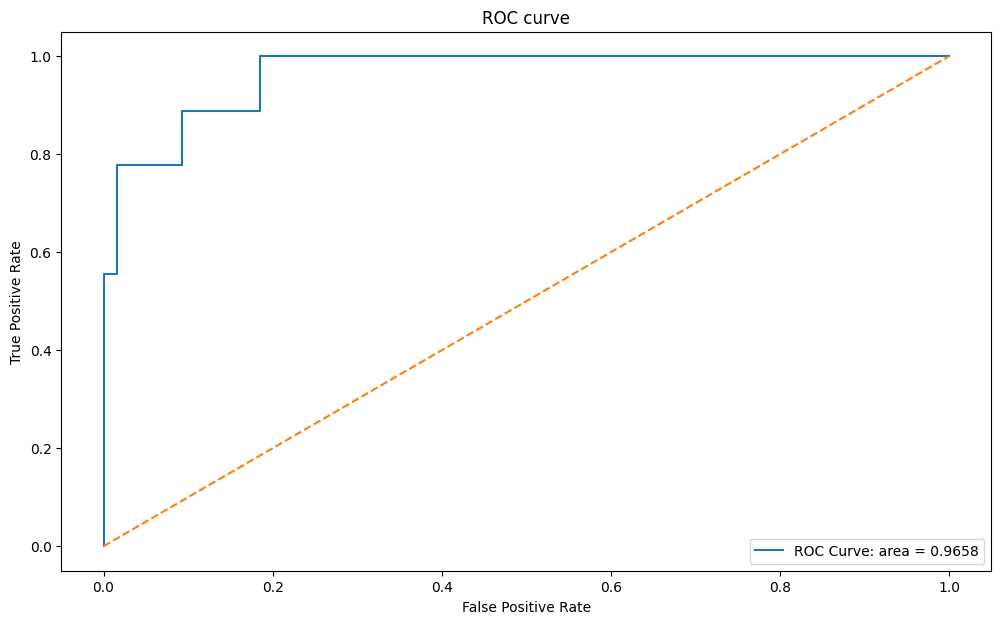

Confusion Matrix:
[[64  1]
 [ 4  5]]


In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix

model_sklearn = LogisticRegression(max_iter=400)
model_sklearn.fit(trainX, trainY)

predictY_prob = model_sklearn.predict_proba(trainX)[:, 1]

fpr, tpr, thresholds = roc_curve(trainY, predictY_prob)
roc_auc = auc(fpr, tpr)

predictY = model_sklearn.predict(trainX)
conf_mat = confusion_matrix(trainY, predictY)

fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr, tpr, label="ROC Curve: area = {:.4f}".format(roc_auc))  # Change 'indicator' to 'label'
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()

print("Confusion Matrix:")
print(conf_mat)


### v.

Test Set Accuracy: 0.5000
Test Set Confusion Matrix:
[[3 7]
 [0 4]]


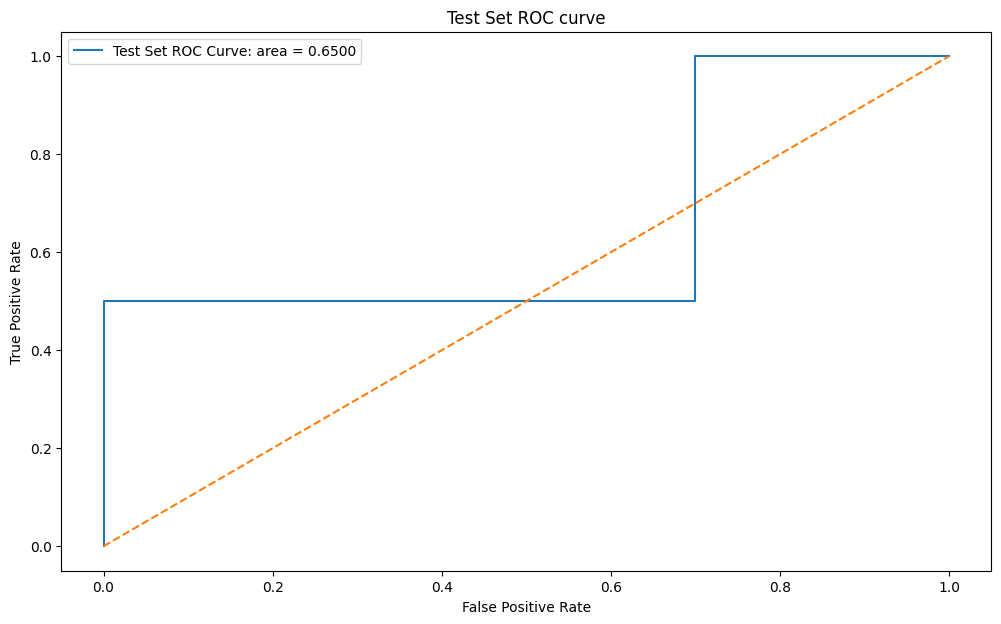

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

test_grouped_data = test.groupby(['activity', 'Source.Name'])
test_result = test_grouped_data.agg(agg_functions)
test_result.columns = ['_'.join(col).strip() for col in test_result.columns.values]
test_result.reset_index(inplace=True)
test_result['indicator'] = test_result['activity'].apply(lambda x: 1 if x in ['bending1', 'bending2'] else 0)

columns_to_drop_test = ['activity', 'Source.Name']
test_result = test_result.drop(columns=columns_to_drop_test)
testX = test_result.iloc[:, :-1]

test_predictY_prob = model_sklearn.predict_proba(testX)[:, 1]
testY = test_result['indicator']

fpr_test, tpr_test, thresholds_test = roc_curve(testY, test_predictY_prob)
roc_auc_test = auc(fpr_test, tpr_test)

test_predictY = model_sklearn.predict(testX)
conf_mat_test = confusion_matrix(testY, test_predictY)

accuracy_test = (conf_mat_test[0, 0] + conf_mat_test[1, 1]) / len(testY)

print("Test Set Accuracy: {:.4f}".format(accuracy_test))
print("Test Set Confusion Matrix:")
print(conf_mat_test)

fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(fpr_test, tpr_test, label="Test Set ROC Curve: area = {:.4f}".format(roc_auc_test))  # Change 'indicator' to 'label'
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")  # Change 'set_xindicator' to 'set_xlabel'
axes.set_ylabel("True Positive Rate")  # Change 'set_yindicator' to 'set_ylabel'
axes.legend()
axes.set_title("Test Set ROC curve")
plt.show()


### Test result is not as good as the training set.
### vi.
### Yes, the summary gives a warning statement of a possible complete quasi-separation: "A fraction 0.32 of observations can be perfectly predicted. This might indicate that there is complete quasi-separation. In this case some parameters will not be identified."
### vii.
### Yes, there was an imbalance in classes. There were 64 of indicator 0. This was obvious when splitting between train and test in HW3.